In [1]:
import sys
for module in [module for module in sys.modules if 'mapping' in module]:
    sys.modules.pop(module)

In [2]:
from mapping.behavioral import Behavior, BehavioralAnalyses, figs_and_text
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
ba = BehavioralAnalyses()
# ba.plot_licking()

Here are some behavioral. (Insert explanation here)

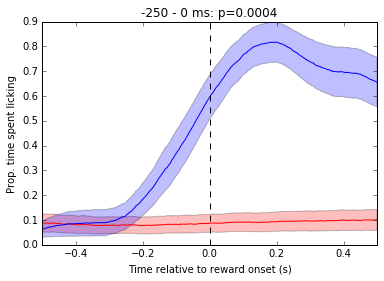


**** LICKING: ACROSS MONKEY

                  df    sum_sq   mean_sq         F    PR(>F)
C(rew)             1  0.586069  0.586069  8.488854  0.006276
C(monkey)          1  0.075247  0.075247  1.089903  0.303859
C(rew):C(monkey)   1  0.068660  0.068660  0.994494  0.325691
Residual          34  2.347353  0.069040       NaN       NaN

**** LICKING: ACROSS DIRECTION

               df    sum_sq   mean_sq          F    PR(>F)
C(rew)          1  1.184796  1.184796  17.298433  0.000087
C(dir)          1  0.006291  0.006291   0.091845  0.762718
C(rew):C(dir)   1  0.001489  0.001489   0.021743  0.883186
Residual       72  4.931391  0.068492        NaN       NaN


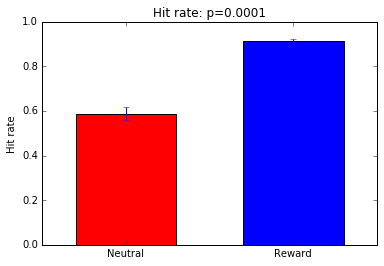


*** HIT RATE: PER MONKEY

           Tom  Spaghetti
P     0.002218    0.01796
sign  1.000000    1.00000

*** HIT RATE: PER DIRECTION

         Ipsi.   Contra.
P     0.000132  0.000132
sign  1.000000  1.000000

*** HIT RATE: PER SET

      Cue set 0  Cue set 1
P      0.000132   0.000132
sign   1.000000   1.000000


/Users/syi115/.local/lib/python3.5/site-packages/scipy/stats/morestats.py:2073: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


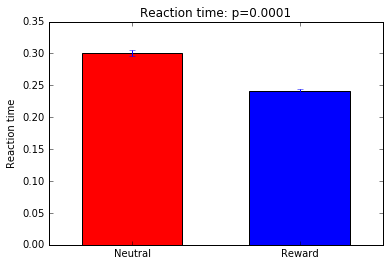


*** REACTION TIME: PER MONKEY

           Tom  Spaghetti
P     0.002218    0.01796
sign -1.000000   -1.00000

*** REACTION TIME: PER DIRECTION

         Ipsi.   Contra.
P     0.000132  0.000132
sign -1.000000 -1.000000

*** REACTION TIME: PER SET

      Cue set 0  Cue set 1
P      0.000132   0.000132
sign  -1.000000  -1.000000


In [6]:
figs_and_text(ba)